# **부동산 가격의 흐름**
- 1986년 1월 1일부터 2019년 1월 1일까지 KB부동산에서 얻은 '전국 종합 매매 가격지수'의 시계열 데이터를 그래프로 확인해본 결과 특정 시기를 제외하면 한국 부동산의 가격은 꾸준히 상승함을 확인
- 부동산의 가치는 입지에 따라 달라짐
-> 단순히 부동산이 오르고 내리냐가 중요한 것이 아닌 어떤 부동산이 오르고 내릴 것인가가 분석에서 중요한 부분

## **파이썬으로 데이터를 가져와 분석하기**

In [21]:
import pandas as pd

#raw_data = pd.read_excel('./../../★(월간)KB주택가격동향_시계열(2019.01)12831994601335062.xls', sheet_name='매매종합')

위와 같이 실행하게 되면 Workbook is encrypted. 에러가 발생
KB부동산에서 제공하는 엑셀 파일의 각 시트가 잠금으로 보호돼 있기 때문
### **xlwings 모듈을 이용해 보호된 엑셀 파일 읽어오기**

In [23]:
import xlwings as xw

path = r'./../../★(월간)KB주택가격동향_시계열(2019.01)12831994601335062.xls'
wb = xw.Book(path)
sheet = wb.sheets['매매종합']
row_num = sheet.range(1,1).end('down').end('down').end('down').row # range() 시트 범위를 설정. end('down') 특정 셀의 데이터가 연속적으로 있을 때 데이터가 끝나는 부분까지 이동
data_range = 'A2:GE' + str(row_num)
df = sheet[data_range].options(pd.DataFrame, index=False, header=True).value

In [24]:
df

,구분,전국,서울,강북,None,None,None,None,None,None,...,None,None,양산,거제,진주,김해,통영,제주도,제주/\n서귀포,기타지방
0,None,None,None,None,강북구,광진구,노원구,도봉구,동대문구,마포구,...,의창구,진해구,None,None,None,None,None,None,None,None
1,Classification,Total,Seoul,Northern seoul,Gangbuk-gu,Gwangjin-gu,Nowon-gu,Dobong-gu,Dongdaemun-gu,Mapo-gu,...,Uichang,Jinhae,Yangsan,Geoje,Jinju,Gimhae,Tongyoung,Jeju-do,Jeju/\nSeogwipo,Non-Metropolitan Area
2,86.1,34.656084,30.043817,41.939986,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,2.0,34.656084,30.043817,41.88915,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,3.0,34.707965,30.002377,41.88915,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,9.0,99.193357,98.007605,97.839253,99.073637,98.705734,97.095235,97.681804,97.907439,98.820704,...,101.421388,100.596436,None,None,101.125117,101.86865,None,None,100.145777,100.63901
395,10.0,99.750306,99.410296,99.243866,99.82197,99.401163,99.320514,99.210824,99.368196,99.798188,...,100.877962,100.447509,None,None,100.852076,101.261576,None,None,100.090889,100.451958
396,11.0,99.902268,99.805216,99.780537,99.969214,99.983455,99.870914,99.76646,99.924326,99.933026,...,100.684723,100.173268,None,None,100.504904,100.382496,None,None,100.016336,100.098021
397,12.0,99.979896,99.960024,99.956759,99.982145,100.0,100.019057,99.942483,100.0,100.006494,...,100.546425,100.057927,None,None,100.153606,100.246337,None,None,100.007185,100.051519


In [25]:
big_col = list(df.columns)
big_col

['구분',
 '전국',
 '서울',
 '강북',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '강남',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '6개광역시',
 '부산',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '대구',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '인천',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '광주',
 None,
 None,
 None,
 None,
 None,
 '대전',
 None,
 None,
 None,
 None,
 None,
 '울산',
 None,
 None,
 None,
 None,
 None,
 '5개광역시\n(인천外)',
 '수도권',
 '세종',
 '경기',
 '수원',
 None,
 None,
 None,
 None,
 '성남',
 None,
 None,
 None,
 '고양',
 None,
 None,
 None,
 '안양',
 None,
 None,
 '부천',
 '의정부',
 '광명',
 '평택',
 '안산',
 None,
 None,
 '과천',
 '구리',
 '남양주',
 '용인',
 None,
 None,
 None,
 '시흥',
 '군포',
 '의왕',
 '하남',
 '오산',
 '파주',
 '이천',
 '안성',
 '김포',
 '양주',
 '동두천',
 '광주',
 '화성',
 '강원',
 '춘천',
 None,
 '원주',
 '충북',
 '청주',
 None,
 None,
 None,
 No

In [26]:
small_col = list(df.iloc[0])
small_col

[None,
 None,
 None,
 None,
 '강북구',
 '광진구',
 '노원구',
 '도봉구',
 '동대문구',
 '마포구',
 '서대문구',
 '성동구',
 '성북구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구',
 None,
 '강남구',
 '강동구',
 '강서구',
 '관악구',
 '구로구',
 '금천구',
 '동작구',
 '서초구',
 '송파구',
 '양천구',
 '영등포구',
 None,
 None,
 '중구',
 '서구',
 '동구',
 '영도구',
 '부산진구',
 '동래구',
 '남구',
 '북구',
 '해운대구',
 '사하구',
 '금정구',
 '연제구',
 '수영구',
 '사상구',
 '기장군',
 '강서구',
 None,
 '중구',
 '동구',
 '서구',
 '남구',
 '북구',
 '수성구',
 '달서구',
 '달성군',
 None,
 '중구',
 '동구',
 '미추홀구',
 '연수구',
 '남동구',
 '부평구',
 '계양구',
 '서구',
 None,
 '동구',
 '서구',
 '남구',
 '북구',
 '광산구',
 None,
 '동구',
 '중구',
 '서구',
 '유성구',
 '대덕구',
 None,
 '중구',
 '남구',
 '동구',
 '북구',
 '울주군',
 None,
 None,
 None,
 None,
 None,
 '장안구',
 '권선구',
 '팔달구',
 '영통구',
 None,
 '수정구',
 '중원구',
 '분당구',
 None,
 '덕양구',
 '일산동구',
 '일산서구',
 None,
 '만안구',
 '동안구',
 None,
 None,
 None,
 None,
 None,
 '단원구',
 '상록구',
 None,
 None,
 None,
 None,
 '처인구',
 '기흥구',
 '수지구',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 Non

- 시-도 계층, 구-군 계층, 영어이름 계층으로 구성

In [28]:
small_col[6]

'노원구'

In [29]:
print(big_col[6])

None


In [30]:
bignames = '서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 6개광역시 5개광역시 수도권 기타지방 구분 전국'
bigname_list = bignames.split(' ')

# big_col = ['서울', None, None, '경기', '강원', None, '충북', None]
# small_col = [서울, 서룰, '강남구', None, None, '춘천시', None, None]

for num, gu_data in enumerate(small_col):
    if gu_data == None:
        small_col[num] = big_col[num]

    check = num
    
    while True:
        if big_col[check] in bigname_list:
            big_col[num] = big_col[check]
            break
        else:
            check = check - 1

big_col[129] = '경기'
big_col[130] = '경기'
small_col[185] = '서귀포'

In [31]:
df.columns = [big_col, small_col]
new_df = df.drop([0,1])

In [32]:
new_df

구분         전국         서울                                   \
         구분         전국         서울         강북        강북구        광진구   
2      86.1  34.656084  30.043817  41.939986       None       None   
3       2.0  34.656084  30.043817   41.88915       None       None   
4       3.0  34.707965  30.002377   41.88915       None       None   
5       4.0  34.448563  29.836618  41.736641       None       None   
6       5.0  34.292922  29.587979  41.279114       None       None   
..      ...        ...        ...        ...        ...        ...   
394     9.0  99.193357  98.007605  97.839253  99.073637  98.705734   
395    10.0  99.750306  99.410296  99.243866   99.82197  99.401163   
396    11.0  99.902268  99.805216  99.780537  99.969214  99.983455   
397    12.0  99.979896  99.960024  99.956759  99.982145      100.0   
398  2019.1      100.0      100.0      100.0      100.0      100.0   

                                                   ...          경남  \
            노원구        도봉구       동대문구         마포구  ...         의창구   
2          None       None       None        None  ...        None   
3          None       None       None        None  ...        None   
4          None       None       None        None  ...        None   
5          None       None       None        None  ...        None   
6          None       None       None        None  ...        None   
..          ...        ...        ...         ...  ...         ...   
394   97.095235  97.681804  97.907439   98.820704  ...  101.421388   
395   99.320514  99.210824  99.368196   99.798188  ...  100.877962   
396   99.870914   99.76646  99.924326   99.933026  ...  100.684723   
397  100.019057  99.942483      100.0  100.006494  ...  100.546425   
398       100.0      100.0      100.0       100.0  ...       100.0   

                                                            제주도              \
            진해구    양산    거제          진주          김해    통영   제주도         서귀포   
2          None  None  None        None        None  None  None        None   
3          None  None  None        None        None  None  None        None   
4          None  None  None        None        None  None  None        None   
5          None  None  None        None        None  None  None        None   
6          None  None  None        None        None  None  None        None   
..          ...   ...   ...         ...         ...   ...   ...         ...   
394  100.596436  None  None  101.125117   101.86865  None  None  100.145777   
395  100.447509  None  None  100.852076  101.261576  None  None  100.090889   
396  100.173268  None  None  100.504904  100.382496  None  None  100.016336   
397  100.057927  None  None  100.153606  100.246337  None  None  100.007185   
398       100.0  None  None       100.0       100.0  None  None       100.0   

           기타지방  
           기타지방  
2          None  
3          None  
4          None  
5          None  
6          None  
..          ...  
394   100.63901  
395  100.451958  
396  100.098021  
397  100.051519  
398       100.0  

[397 rows x 187 columns]

In [33]:
# index를 구분의 날짜로 사용
index_list = list(new_df['구분']['구분'])

new_index = []

for num, df_index in enumerate(index_list):
    temp = str(df_index).split('.')
    if int(temp[0]) > 12: 
        if len(temp[0]) == 2:
            new_index.append('19' + temp[0] + '.' + temp[1])
        else:
            new_index.append(temp[0] + '.' + temp[1])
    else:
        new_index.append(new_index[num-1].split('.')[0] + '.' + temp[0])

In [34]:
new_df.set_index(pd.to_datetime(new_index), inplace=True)
cleaned_df = new_df.drop(('구분','구분'), axis=1)

C:\Users\laiep\AppData\Local\Temp\ipykernel_14248\1029113310.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_df.set_index(pd.to_datetime(new_index), inplace=True)


In [35]:
cleaned_df

전국         서울                                               \
                   전국         서울         강북        강북구        광진구         노원구   
1986-01-01  34.656084  30.043817  41.939986       None       None        None   
1986-02-01  34.656084  30.043817   41.88915       None       None        None   
1986-03-01  34.707965  30.002377   41.88915       None       None        None   
1986-04-01  34.448563  29.836618  41.736641       None       None        None   
1986-05-01  34.292922  29.587979  41.279114       None       None        None   
...               ...        ...        ...        ...        ...         ...   
2018-09-01  99.193357  98.007605  97.839253  99.073637  98.705734   97.095235   
2018-10-01  99.750306  99.410296  99.243866   99.82197  99.401163   99.320514   
2018-11-01  99.902268  99.805216  99.780537  99.969214  99.983455   99.870914   
2018-12-01  99.979896  99.960024  99.956759  99.982145      100.0  100.019057   
2019-01-01      100.0      100.0      100.0      100.0      100.0       100.0   

                                                         ...          경남  \
                  도봉구       동대문구         마포구       서대문구  ...         의창구   
1986-01-01       None       None        None       None  ...        None   
1986-02-01       None       None        None       None  ...        None   
1986-03-01       None       None        None       None  ...        None   
1986-04-01       None       None        None       None  ...        None   
1986-05-01       None       None        None       None  ...        None   
...               ...        ...         ...        ...  ...         ...   
2018-09-01  97.681804  97.907439   98.820704  95.576927  ...  101.421388   
2018-10-01  99.210824  99.368196   99.798188  97.361109  ...  100.877962   
2018-11-01   99.76646  99.924326   99.933026  98.497458  ...  100.684723   
2018-12-01  99.942483      100.0  100.006494  99.629792  ...  100.546425   
2019-01-01      100.0      100.0       100.0      100.0  ...       100.0   

                                                                   제주도  \
                   진해구    양산    거제          진주          김해    통영   제주도   
1986-01-01        None  None  None        None        None  None  None   
1986-02-01        None  None  None        None        None  None  None   
1986-03-01        None  None  None        None        None  None  None   
1986-04-01        None  None  None        None        None  None  None   
1986-05-01        None  None  None        None        None  None  None   
...                ...   ...   ...         ...         ...   ...   ...   
2018-09-01  100.596436  None  None  101.125117   101.86865  None  None   
2018-10-01  100.447509  None  None  100.852076  101.261576  None  None   
2018-11-01  100.173268  None  None  100.504904  100.382496  None  None   
2018-12-01  100.057927  None  None  100.153606  100.246337  None  None   
2019-01-01       100.0  None  None       100.0       100.0  None  None   

                              기타지방  
                   서귀포        기타지방  
1986-01-01        None        None  
1986-02-01        None        None  
1986-03-01        None        None  
1986-04-01        None        None  
1986-05-01        None        None  
...                ...         ...  
2018-09-01  100.145777   100.63901  
2018-10-01  100.090889  100.451958  
2018-11-01  100.016336  100.098021  
2018-12-01  100.007185  100.051519  
2019-01-01       100.0       100.0  

[397 rows x 186 columns]

In [36]:
def KBpriceindex_preprocessing(path, data_type):

    # 경로 설정 및 시트 가져오기
    wb = xw.Book(path)
    sheet = wb.sheets[data_type]
    row_num = sheet.range(1,1).end('down').row
    raw_data = sheet[data_range].options(pd.DataFrame, index=False, header=True).value

    # 컬럼 정리. 3개의 계층 구조 -> 2개의 계층 구조로 변환
    bignames = '서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 6개광역시 5개광역시 수도권 기타지방 구분 전국'
    bigname_list = bignames.split(' ')
    big_col = list(raw_data.columns)
    small_col = list(raw_data.iloc[0])
                     
    for num, gu_data in enumerate(small_col):
        if gu_data == None:
            small_col[num] = big_col[num]

        check = num
    
        while True:
            if big_col[check] in bigname_list:
                big_col[num] = big_col[check]
                break
            else:
                check = check - 1

    big_col[129] = '경기'
    big_col[130] = '경기'
    small_col[185] = '서귀포'

    raw_data.columns = [big_col, small_col]
    new_col_data = raw_data.drop([0,1])

    # index 정리. 구분 컬럼의 날짜를 datetime 형식으로 변경
    index_list = list(new_col_data['구분']['구분'])
    
    new_index = []
    
    for num, raw_index in enumerate(index_list):
        temp = str(raw_index).split('.')
        if int(temp[0]) > 12: 
            if len(temp[0]) == 2:
                new_index.append('19' + temp[0] + '.' + temp[1])
            else:
                new_index.append(temp[0] + '.' + temp[1])
        else:
            new_index.append(new_index[num-1].split('.')[0] + '.' + temp[0])
    
    new_col_data.set_index(pd.to_datetime(new_index, format='%Y.%m'), inplace=True)
    cleaned_data = new_col_data.drop(('구분', '구분'), axis=1)

    return cleaned_data

### **시각화**

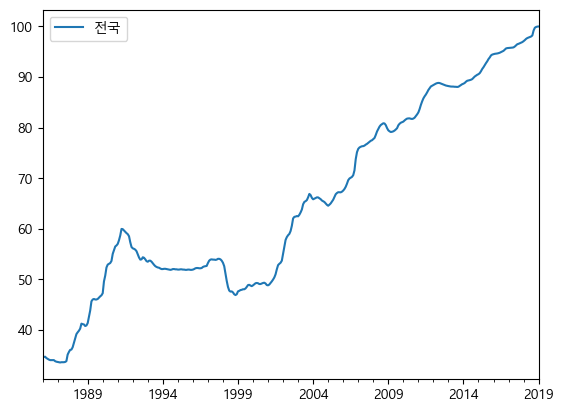

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

data_type = '매매종합'
new_data = KBpriceindex_preprocessing(path, data_type)
new_data['전국']['전국'].plot(legend='전국')
plt.show()

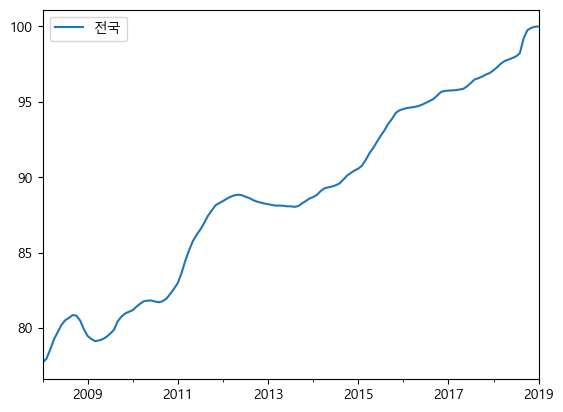

In [59]:
new_data['전국']['전국']['2008-01':].plot(legend='전국')
plt.show()

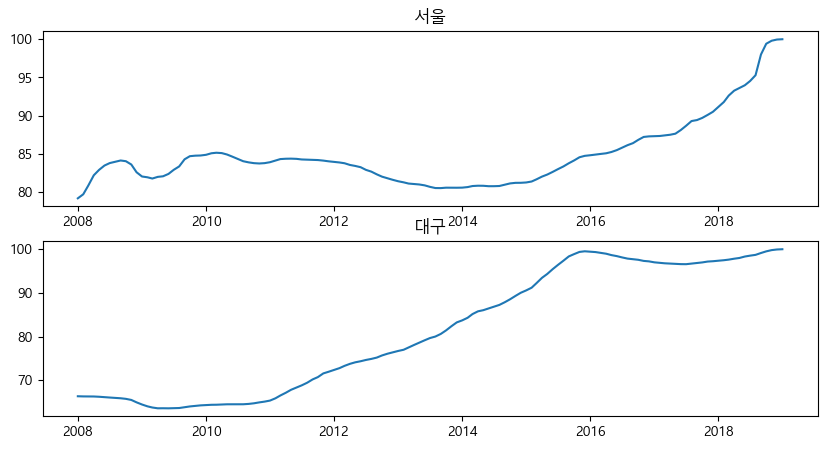

In [61]:
plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.title('서울')
plt.plot(new_data['서울']['서울']['2008-01':])

plt.subplot(2, 1, 2)
plt.title('대구')
plt.plot(new_data['대구']['대구']['2008-01' :])

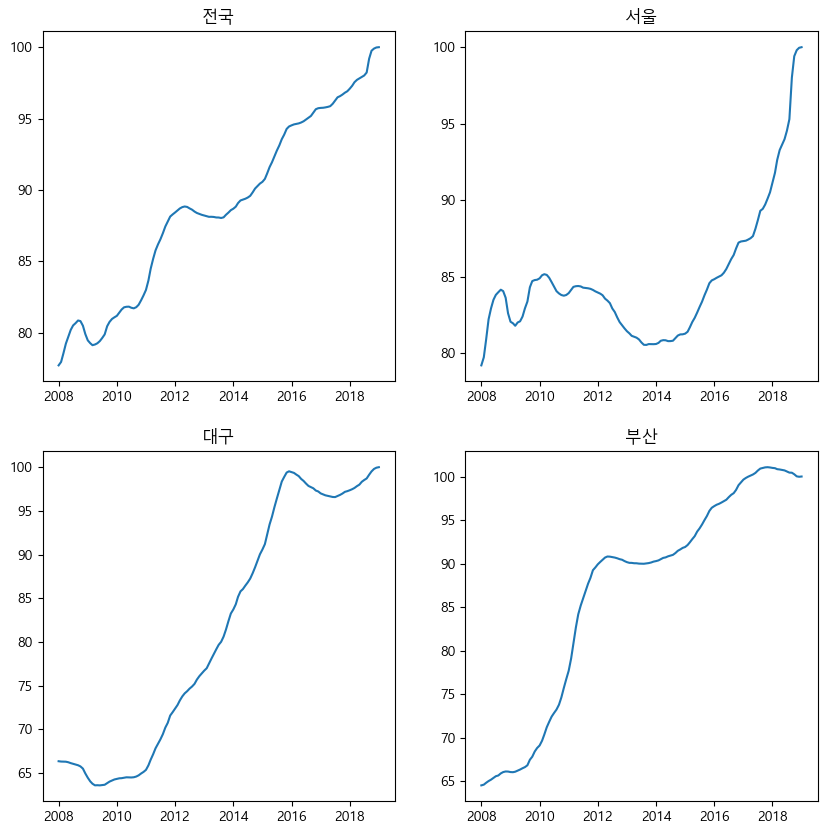

In [63]:
spots = '전국 서울 대구 부산'
start_date = '2008-1'
spot_list = spots.split(' ')
num_row = int((len(spot_list)-1)/2)+1

plt.figure(figsize=(10, num_row*5))
for i, spot in enumerate(spot_list):
    plt.subplot(num_row, 2, i+1)
    plt.title(spot)
    plt.plot(new_data [spot][spot][start_date:])

plt.show()

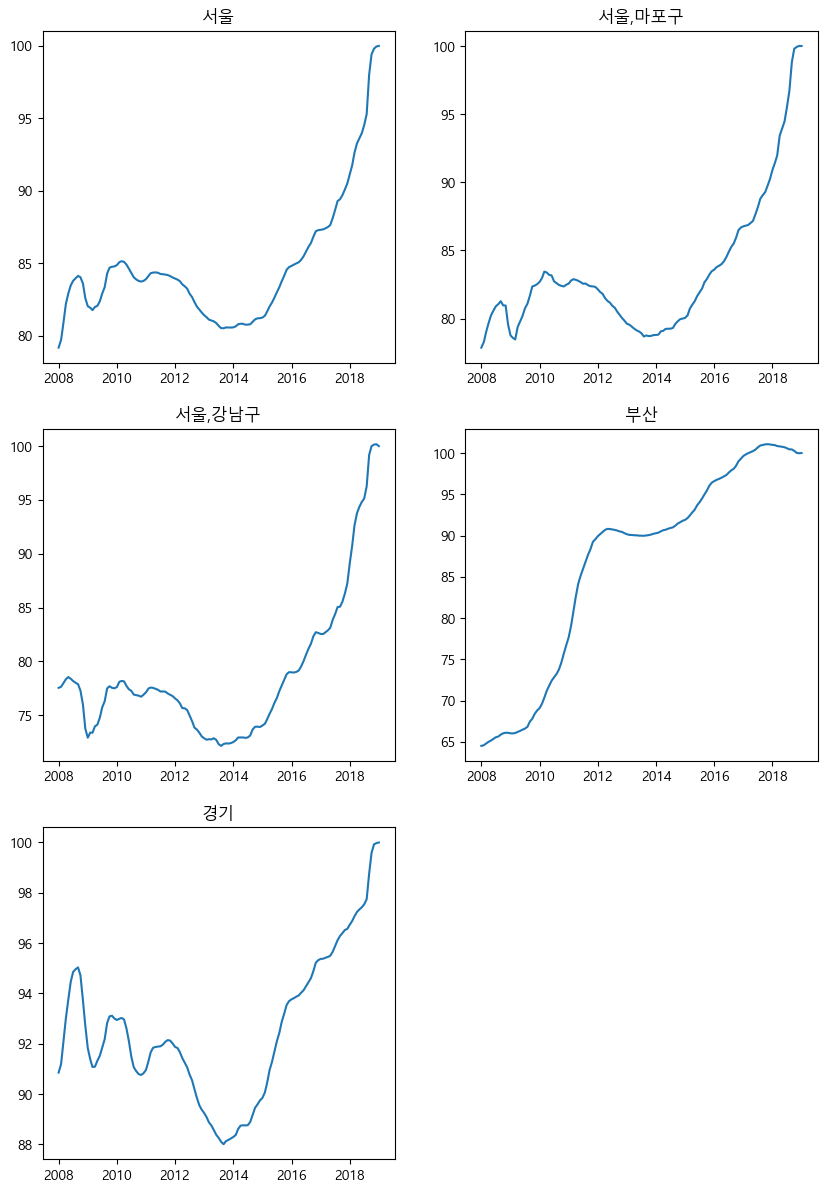

In [65]:
spots = '서울 서울,마포구 서울,강남구 부산 경기'
spot_list = spots.split(' ')
num_row = int(len(spot_list)-1/2)+1

plt.figure(figsize=(10, num_row*5))
for i, spot in enumerate(spot_list):
    plt.subplot(num_row, 2, i+1)
    plt.title(spot)
    if ',' in spot:
        si, gu = spot.split(',')
    else:
        si = gu = spot
    plt.plot(new_data[si][gu][start_date:])
plt.show()

### **부동산 가격지수 증감률**

In [67]:
diff = (new_data.loc['2018-01-01'] - new_data.loc['2016-01-01']) / new_data.loc['2016-01-01'] * 100
diff.sort_values()

경남   성산구   -10.588477
경북   구미     -7.297924
경남   의창구    -6.394714
     창원     -5.338448
경북   북구     -5.082983
              ...    
     김천           NaN
경남   양산           NaN
     거제           NaN
     통영           NaN
제주도  제주도          NaN
Length: 186, dtype: object

In [69]:
print('하위 10개')
print(diff.dropna().sort_values()[:10])
print(' ')
print('상위 10개')
print(diff.dropna().sort_values(ascending=False).head(10))

하위 10개
경남  성산구   -10.588477
경북  구미     -7.297924
경남  의창구    -6.394714
    창원     -5.338448
경북  북구     -5.082983
경남  진해구    -4.975431
경북  경북     -4.957619
울산  동구     -4.594578
충북  상당구    -4.476693
울산  북구     -4.458143
dtype: object
 
상위 10개
서울  강남구     12.831181
경기  분당구     11.066415
서울  서초구     10.354472
    송파구     10.229412
    영등포구    10.171195
    성동구      9.575116
    강동구      9.076968
    마포구      8.764148
    강남       8.617133
    양천구      8.282181
dtype: object


C:\Users\laiep\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy sho

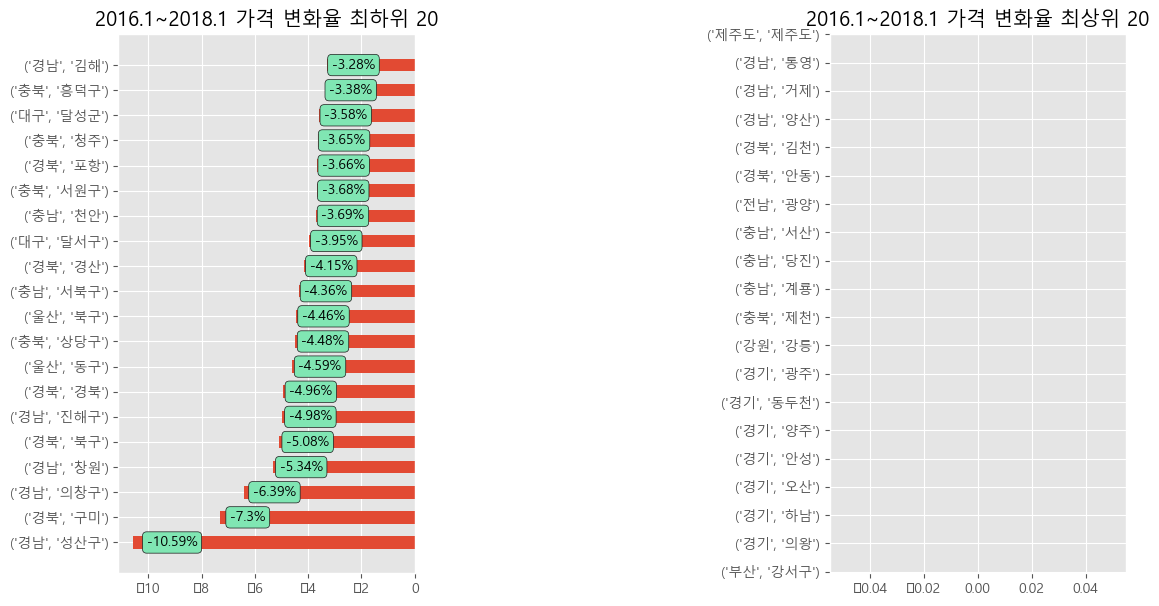

In [71]:
import numpy as np
from matplotlib import style
style.use('ggplot')

fig = plt.figure(figsize=(13,7))
ind = np.arange(20)

ax = fig.add_subplot(1, 3, 1)
plt.title('2016.1~2018.1 가격 변화율 최하위 20')
rects = plt.barh(ind, diff.sort_values()[:20].values, align='center', height=0.5)
plt.yticks(ind, diff.sort_values()[:20].index)

for i, rect in enumerate(rects):
    ax.text(0.95 * rect.get_width(),
            rect.get_y() + rect.get_height() / 2.0,
            str(round(diff.sort_values()[:20].values[i],2)) + '%',
            ha='left', va='center', bbox=dict(boxstyle='round', fc=(0.5, 0.9, 0.7), ec='0.1'))

ax2 = fig.add_subplot(1,3,3)
plt.title('2016.1~2018.1 가격 변화율 최상위 20')
rects2 = plt.barh(ind, diff.sort_values()[-20:].values,align='center', height=0.5)
plt.yticks(ind, diff.sort_values()[-20:].index)

for i, rect in enumerate(rects2):
    ax2.text(0.95 * rect.get_width(),
            rect.get_y() + rect.get_height() / 2.0,
            str(round(diff.sort_values()[-20:].values[i],2)) + '%',
            ha='right', va='center', bbox=dict(boxstyle='round', fc=(0.5, 0.9, 0.7), ec='0.1'))

plt.show()

C:\Users\laiep\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


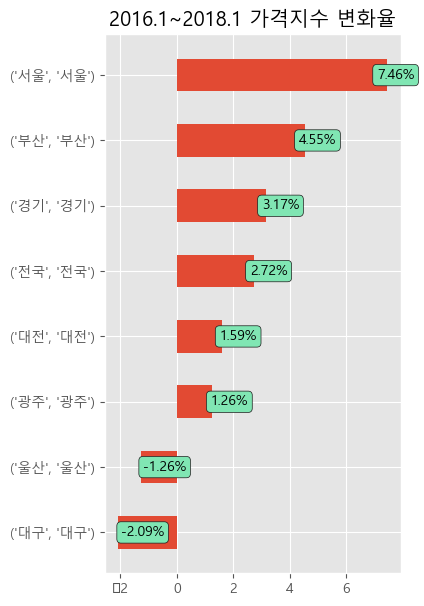

In [73]:
loca = '전국 서울 부산 경기 대구 광주 울산 대전'

temp_list = loca.split(' ')
loca_list = []
for temp in temp_list:
    if ',' in temp:
        temp_list = temp.split(',')
        loca_list.append((temp_list[0], temp_list[1]))
    else:
        loca_list.append((temp, temp))

diff = ((new_data.loc['2018-01-01', loca_list] - new_data.loc['2016-01-01', loca_list])/new_data.loc['2016-01-01', loca_list] * 100).sort_values()

num = len(loca_list)
fig = plt.figure(figsize=(13, 7))
ind = np.arange(num)

ax = fig.add_subplot(1,3,1)
plt.title('2016.1~2018.1 가격지수 변화율')
rects = plt.barh(ind, diff.head(num).values, align='center', height=0.5)
plt.yticks(ind, diff.head(num).index)
for i, rect in enumerate(rects):
    ax.text(0.95 * rect.get_width(), rect.get_y() + rect.get_height() / 2.0,
    str(round(diff.head(20).values[i], 2)) + '%', ha='left', va='center', bbox=dict(boxstyle='round', fc=(0.5, 0.9, 0.7), ec='0.1'))

plt.show()

## **'기준'이 필요**
- 부동산 가격이 장기적으로 시간을 따라 꾸준히 우상향, 지역에 따라 서로 다른 속성을 갖음
- 가격 상승에 대한 원인과 그로인해 생기는 의문점에 대한 판단이 쉽지 않음
  - A지역의 부동산 가격이 B지역보다 가격지수가 많이 오른 것은 A지역의 가격이 비싸졌다는 것을 의미하는가?
  - A지역의 입지가 B지역의 입지보다 좋다는 것을 의미하는가?

 -> 흔히 부동산 가격과 비교되는 데이터로는 지역의 소득과 물가가 있는데 **소득**을 **부동산 가격**과 비교해 파악

### **PIR(Price to Income Ration)**
- 주택가격 / 가구 소득

In [76]:
path = r'./행정구역_시도_별_1인당_지역내총생산__지역총소득__개인소득_20180821155737.xlsx'

raw = pd.read_excel(path, sheet_name='데이터', index_col=0)

C:\Users\laiep\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [82]:
raw.drop(['행정구역(시도)별'], inplace=True)

In [84]:
raw

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
행정구역(시도)별,,,,,,,,,,,,,,,,,
전국,8602,8964,9419,9848,10493,11198,11656,12407,12883,13173,14068,14706,15256,15799,16394,17222,17653
서울특별시,10119,10616,11185,11787,12493,13453,13955,15130,15401,15405,16495,17215,18018,18565,19104,19962,20506
부산광역시,8231,8539,9024,9364,9835,10581,11077,11825,12469,12791,13672,14694,15430,15972,16369,17170,17599
대구광역시,8253,8481,8886,9261,9711,10482,10925,11562,12017,12315,13376,14183,14635,15047,15851,16686,16987
인천광역시,7761,7979,8409,8766,9378,10021,10489,11074,11625,12056,13022,13513,14167,14714,15549,16299,16974
광주광역시,7985,8426,8686,9175,9657,10499,10997,11665,12180,13107,13464,13927,14528,14849,15341,16105,16575
대전광역시,8047,8461,8864,9391,9912,10697,11313,11963,12439,13229,14205,14801,15280,15721,16207,17064,17680
울산광역시,9714,10394,10952,11517,12667,13555,13931,15380,16046,16260,17329,18507,18694,19011,19238,19963,19496
경기도,8865,9126,9672,9952,10554,11181,11583,12084,12592,12697,13592,14303,14773,15384,16131,17130,17752


In [86]:
index_list = raw.index
new_index = []
for temp in index_list:
    if temp[-1] == '시':
        new_index.append(temp[:2])
    elif temp[-1] == '도':
        if len(temp) == 3:
            new_index.append(temp[:2])
        elif len(temp) == 4:
            new_index.append(temp[0] + temp[2])
        else:
            new_index.append('제주')
    else:
        new_index.append(temp)


raw.index = new_index

In [92]:
income_data = raw.T

In [108]:
# [예제 2.31] KB 가격지수 데이터 가져오기 

def KBpriceindex_preprocessing(path, data_type):
    # path : KB 데이터 엑셀 파일의 디렉토리 (문자열)
    # data_type : ‘매매종합’, ‘매매APT’, ‘매매연립’, ‘매매단독’, ‘전세종합’, ‘전세APT’, ‘전세연립’, ‘전세단독’ 중 하나
    
    wb = xw.Book(path)                
    sheet = wb.sheets[data_type]   
    row_num = sheet.range(1,1).end('down').end('down').end('down').row  
    data_range = 'A2:GE' + str(row_num)
    raw_data = sheet[data_range].options(pd.DataFrame, index=False, header=True).value 
    
    bignames = '서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 6개광역시 5개광역시 수도권 기타지방 구분 전국'
    bigname_list = bignames.split(' ')
    big_col = list(raw_data.columns)
    small_col = list(raw_data.iloc[0])

    for num, gu_data in enumerate(small_col):
        if gu_data == None:
            small_col[num] = big_col[num]

        check = num
        while True:
            if big_col[check] in bigname_list:
                big_col[num] = big_col[check]
                break
            else:
                check = check - 1
                
    big_col[129] = '경기' 
    big_col[130] = '경기'
    small_col[185] = '서귀포'
    
    raw_data.columns = [big_col, small_col]
    new_col_data = raw_data.drop([0,1])
    
    index_list = list(new_col_data['구분']['구분'])

    new_index = []

    for num, raw_index in enumerate(index_list):
        temp = str(raw_index).split('.')
        if int(temp[0]) > 12 :
            if len(temp[0]) == 2:
                new_index.append('19' + temp[0] + '.' + temp[1])
            else:
                new_index.append(temp[0] + '.' + temp[1])
        else:
            new_index.append(new_index[num-1].split('.')[0] + '.' + temp[0])

    new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
    cleaned_data  = new_col_data.drop(('구분', '구분'), axis=1)
    return cleaned_data


path = r'../../★(월간)KB주택가격동향_시계열(2019.01)12831994601335062.xls'
data_type = '매매종합'
price_data = KBpriceindex_preprocessing(path, data_type)


C:\Users\laiep\AppData\Local\Temp\ipykernel_14248\382497901.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_col_data.set_index(pd.to_datetime(new_index), inplace=True)


C:\Users\laiep\AppData\Local\Temp\ipykernel_14248\2087996416.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp_df['소득 변화율'] = (temp_df[location + '소득']/temp_df[location + '소득'][0] - 1 )*100
C:\Users\laiep\AppData\Local\Temp\ipykernel_14248\2087996416.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp_df['부동산 기격 지수 변화율'] = (temp_df[location + '부동산 가격지수']/temp_df[location + '부동산 가격지수'][0] - 1 )*100
C:\Users\laiep\AppData\Local\Temp\ipykernel_14248\2087996416.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as label

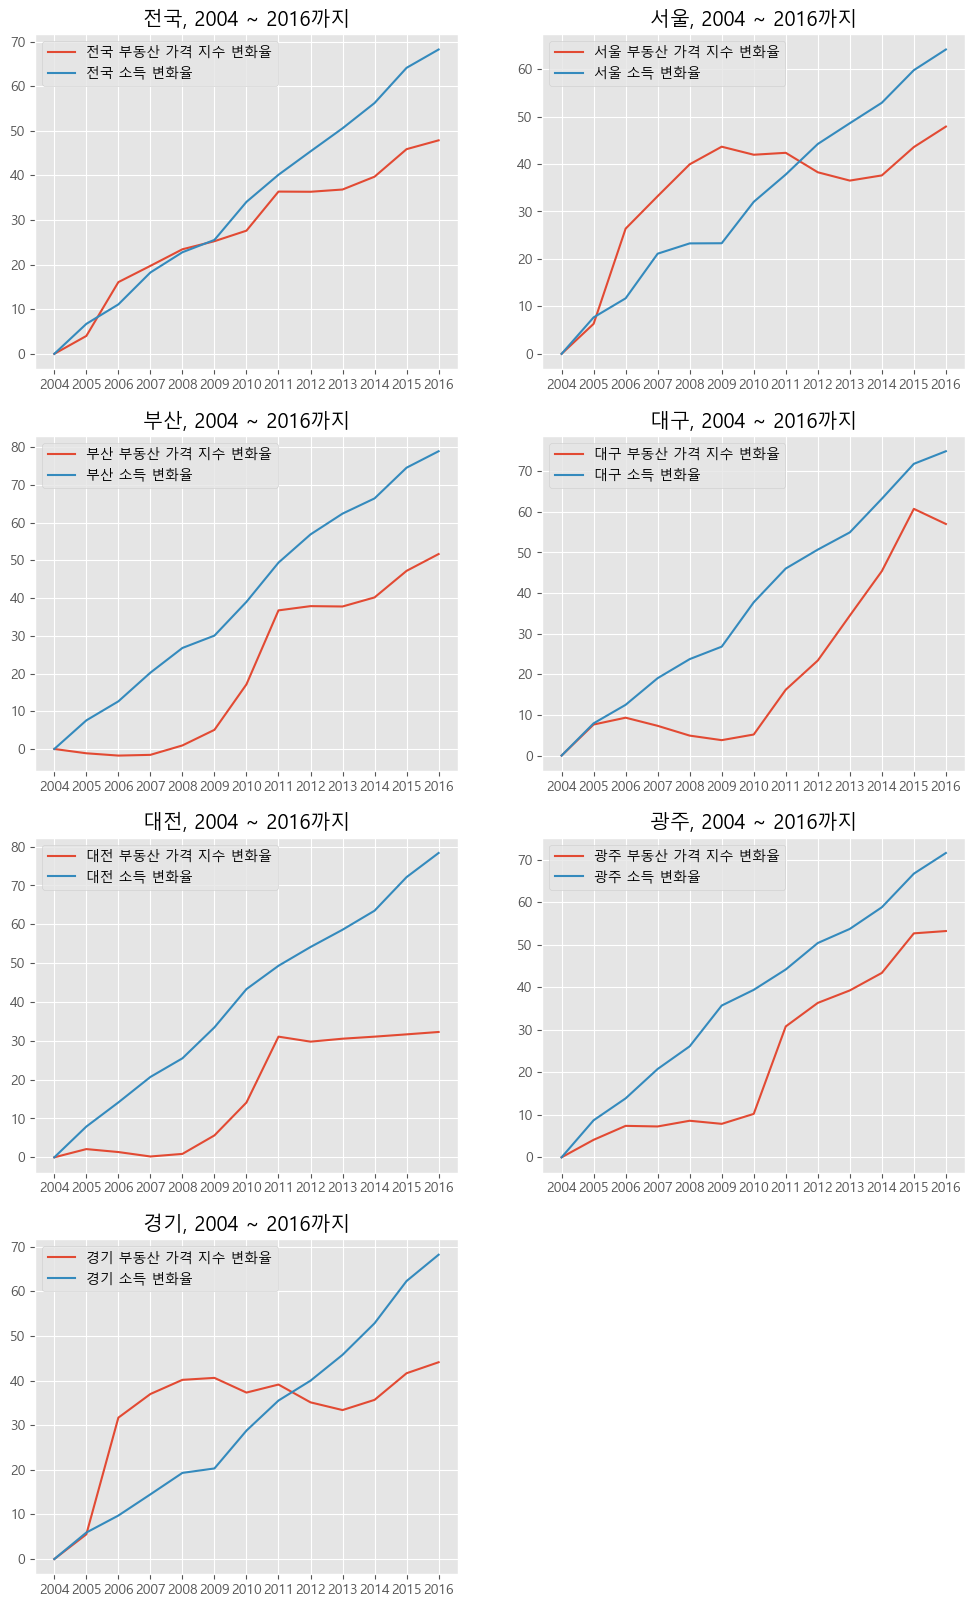

In [110]:
# [예제 2.32] 특정 지역들의 부동산 가격지수 변화와 개인소득 변화를 subplot으로 나타내기 

location_list = ['전국', '서울', '부산', '대구', '대전' ,'광주', '경기']
start_year = '2004'
end_year = '2016'

num_row = int((len(location_list)-1)/2)+1
plt.figure(figsize=(12, num_row*5))
for j, location in enumerate(location_list):
    year_data = []
    for i in range(int(start_year), int(end_year) + 1):
        if location == '제주도':
            year_data.append(price_data[location]['서귀포'][str(i)+'.12.1'])
        else:
            year_data.append(price_data[location][location][str(i)+'.12.1'])

    temp_df = pd.DataFrame(income_data[location][start_year:end_year])
    temp_df.columns = [location + '소득']
    temp_df[location + '부동산 가격지수'] = year_data
    temp_df['소득 변화율'] = (temp_df[location + '소득']/temp_df[location + '소득'][0] - 1 )*100
    temp_df['부동산 기격 지수 변화율'] = (temp_df[location + '부동산 가격지수']/temp_df[location + '부동산 가격지수'][0] - 1 )*100

    plt.subplot(num_row, 2, j+1)
    plt.title(location + ', ' + start_year + ' ~ ' + end_year + '까지')
    plt.plot(temp_df['부동산 기격 지수 변화율'], label=location + ' 부동산 가격 지수 변화율')
    plt.plot(temp_df['소득 변화율'], label=location + ' 소득 변화율')
    plt.legend()

In [112]:
path = r'../../★(월간)KB주택가격동향_시계열(2019.01)12831994601335062.xls'
wb = xw.Book(path)
sheet = wb.sheets['PIR(월별)']
row_num = sheet.range('J2').end('down').row
data_range = 'B2:N' + str(row_num)
pir_rawdata = sheet[data_range].options(pd.DataFrame, index=False, header=True).value

In [114]:
pir_rawdata

,None,None,None,전국 All cities,None,None,None,None,서울 Seoul,None,None,None,None
0,None,None,None,가구 연소득 Household Income,None,None,None,None,가구 연소득 Household Income,None,None,None,None
1,None,None,None,1분위,2분위,3분위,4분위,5분위,1분위,2분위,3분위,4분위,5분위
2,'08.12\n,평균\n주택가격\nMean Housing Price,1분위,5.441946,2.645645,1.858094,1.386281,0.837666,16.73683,8.30789,5.856874,4.382019,2.65692
3,None,None,2분위,9.771072,4.750284,3.336228,2.489082,1.504038,25.967568,12.889878,9.087072,6.798801,4.122272
4,None,None,3분위,15.371844,7.473143,5.248552,3.915823,2.366151,33.968421,16.861371,11.886884,8.893576,5.392382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,9.0,평균\n주택가격\nMean Housing Price,1분위,7.486701,3.469953,2.378366,1.733279,1.013204,19.002977,8.835991,6.078142,4.424658,2.571079
588,None,None,2분위,12.567928,5.825012,3.992564,2.909656,1.700866,31.15124,14.484682,9.96379,7.253263,4.214724
589,None,None,3분위,17.462065,8.093358,5.547328,4.042718,2.363209,41.793505,19.433116,13.367741,9.731211,5.65461
590,None,None,4분위,25.125387,11.645172,7.981802,5.816887,3.400315,58.406583,27.157853,18.68147,13.599404,7.902339


In [116]:
big_col = list(pir_rawdata.columns)
big_col[0] = 'index1'
big_col[1] = 'index2'
big_col[2] = 'index3'

for num, col in enumerate(big_col):
    if col == None:
        big_col[num] = big_col[num - 1]
    else:
        pass


small_col = list(pir_rawdata.loc[1])
small_col[0] = 'index1'
small_col[1] = 'index2'
small_col[2] = 'index3'

pir_rawdata.columns = [big_col, small_col]
pir_rawdata.drop([0,1], inplace=True)

big_index = list(pir_rawdata['index1']['index1'])
for num, index in enumerate(big_index):
    if index is not None:
        if type(index) == str:
            big_index[num] = '20' + index.split(".")[0][1:] + '.' + index.split(".")[1][:2]
        else:
            big_index[num] = big_index[num - 1].split(".")[0] + "." +  str(int(index))
    else:
        big_index[num] = big_index[num - 1]

small_index = list(pir_rawdata['index3']['index3'])
pir_rawdata.index = [pd.to_datetime(big_index), small_index]

del pir_rawdata['index1']
del pir_rawdata['index2']
del pir_rawdata['index3']

pir_rawdata.index.names = ['날짜', '평균주택가격']

C:\Users\laiep\AppData\Local\Temp\ipykernel_14248\3087564295.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pir_rawdata.index = [pd.to_datetime(big_index), small_index]


In [124]:
pir_rawdata.xs('3분위', level='평균주택가격')

전국 All cities                                           서울 Seoul  \
                     1분위       2분위       3분위       4분위       5분위        1분위   
날짜                                                                            
2008-12-01     15.371844  7.473143  5.248552  3.915823  2.366151  33.968421   
2009-01-01       16.1499  7.475327  5.167887  3.769598   2.18144  36.696595   
2009-02-01     16.019821  7.415118  5.126262  3.739236   2.16387   36.72688   
2009-03-01     15.954978  7.385104  5.105513  3.724101  2.155111  36.549641   
2009-04-01     15.393399  7.256726  5.141413  3.863399  2.414333   35.80001   
...                  ...       ...       ...       ...       ...        ...   
2018-05-01     17.241454  8.157808  5.794505  4.195956  2.500684  37.413006   
2018-06-01     17.233155  8.153881  5.791716  4.193937  2.499481  37.564071   
2018-07-01     17.317376  8.026297  5.501363  4.009221  2.343627   38.79512   
2018-08-01     17.321513  8.028215  5.502677  4.010179  2.344187  39.874755   
2018-09-01     17.462065  8.093358  5.547328  4.042718  2.363209  41.793505   

                                                      
                  2분위        3분위       4분위       5분위  
날짜                                                    
2008-12-01  16.861371  11.886884  8.893576  5.392382  
2009-01-01  17.181597  11.838926  8.637301  4.975489  
2009-02-01  17.195777  11.848696  8.644429  4.979596  
2009-03-01  17.112793  11.791516  8.602712  4.955565  
2009-04-01  16.966925   11.99662  9.019494  5.624337  
...               ...        ...       ...       ...  
2018-05-01  17.899497  12.780376  9.262446  5.484901  
2018-06-01  17.971771   12.83198  9.299846  5.507048  
2018-07-01  18.038929  12.408702  9.033066  5.248932  
2018-08-01  18.540937  12.754025  9.284449  5.395005  
2018-09-01  19.433116  13.367741  9.731211   5.65461  

[118 rows x 10 columns]

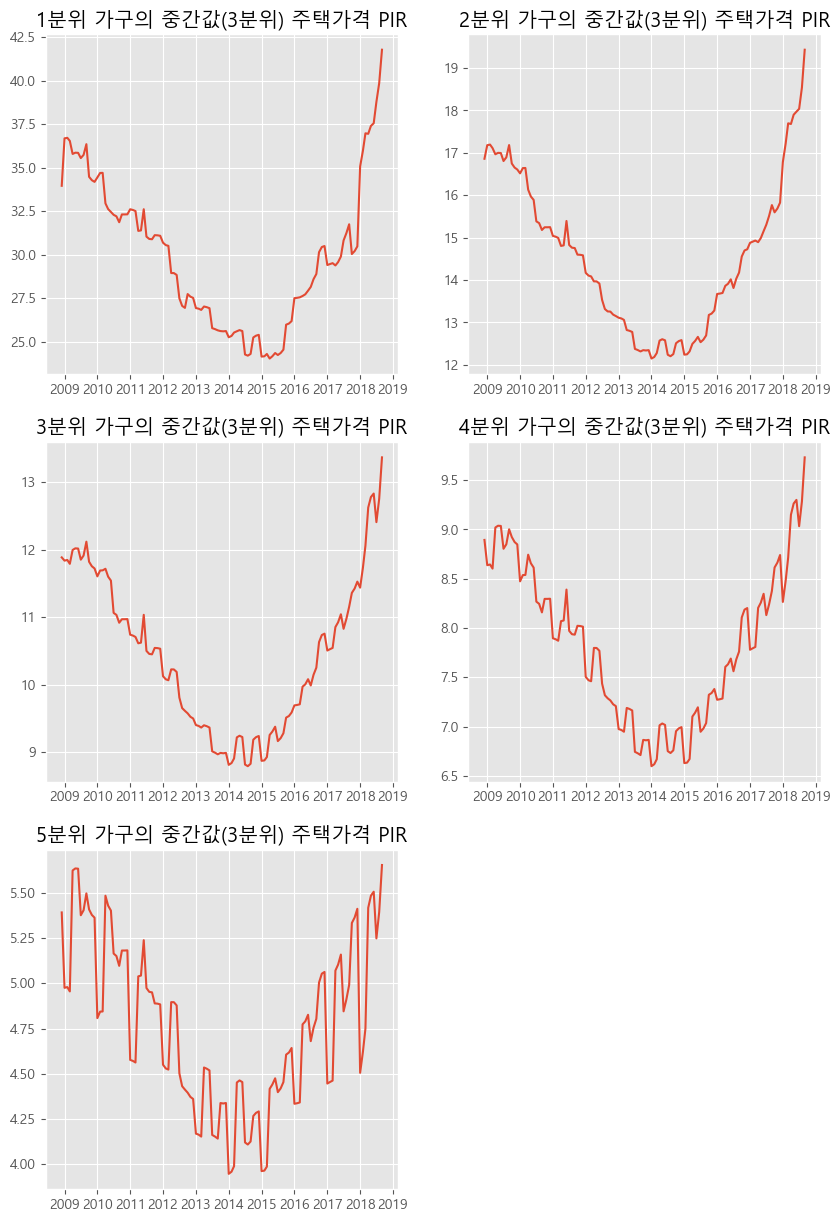

In [126]:
gagus = ['1분위', '2분위', '3분위', '4분위', '5분위']
location = '서울 Seoul'
num_row = int((len(gagus)-1)/2)+1

plt.figure(figsize=(10, num_row*5))
for i, gagu in enumerate(gagus):
    plt.subplot(num_row, 2, i+1)
    plt.title(gagu + " 가구의 중간값(3분위) 주택가격 PIR")
    plt.plot(pir_rawdata.xs('3분위', level='평균주택가격')[location][gagu])
    
plt.show()

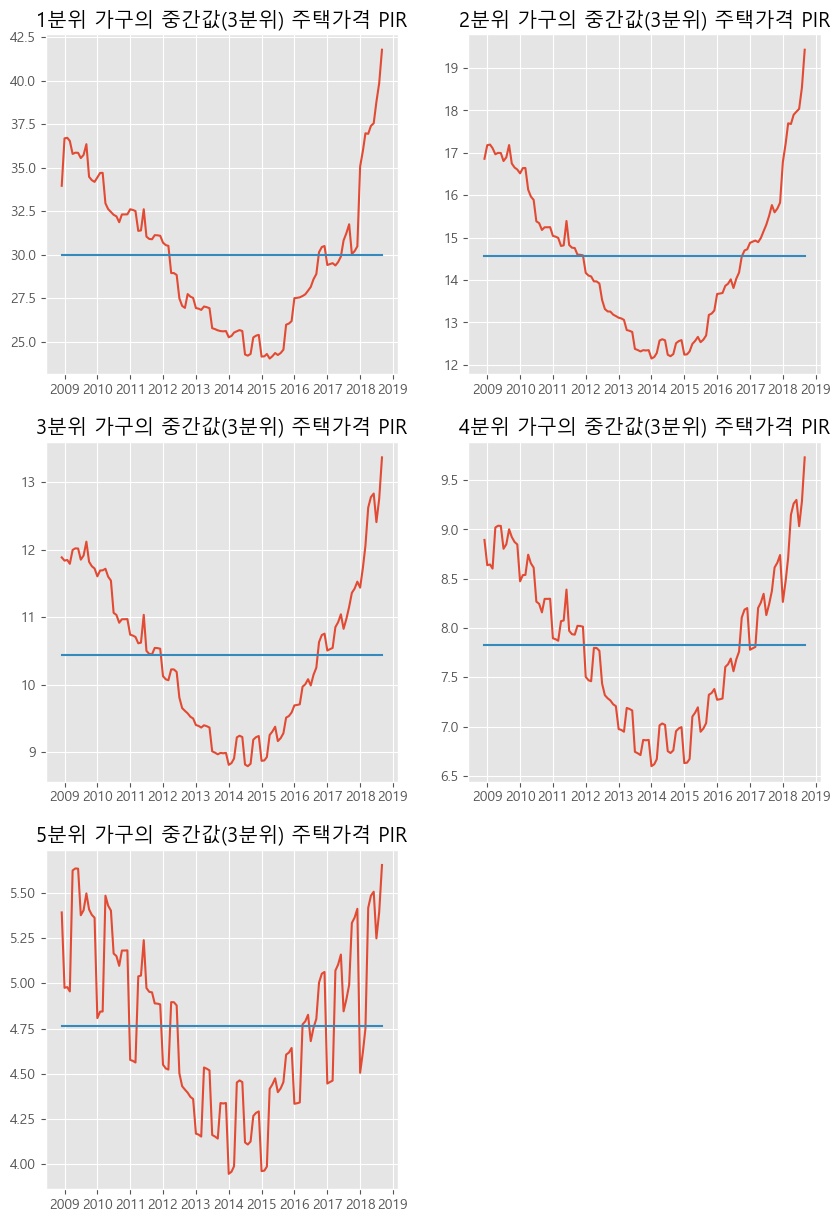

In [128]:
gagus = ['1분위', '2분위', '3분위', '4분위', '5분위']
location = '서울 Seoul'
house_price_level = '3분위'
num_row = int((len(gagus)-1)/2)+1

plt.figure(figsize=(10, num_row*5))
for i, gagu in enumerate(gagus):
    plt.subplot(num_row, 2, i+1)
    plt.title(gagu + " 가구의 중간값(" + house_price_level + ") 주택가격 PIR")
    plt.plot(pir_rawdata.xs(house_price_level, level='평균주택가격')[location][gagu])
    indx = pir_rawdata.xs(house_price_level, level='평균주택가격')[location][gagu].index
    long_mean = pir_rawdata.xs(house_price_level, level='평균주택가격')[location][gagu].mean()
    plt.plot(indx, [long_mean for a in range(len(pir_rawdata.xs(house_price_level, level='평균주택가격')[location][gagu]))])
    
plt.show()